## Visualizing Music Taste Profile using Machine Learning - K music

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import svm

from math import pi
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


In [2]:
#Load songdata

#top_annual_df = pd.read_csv("./top_tracks_final.csv")
# top_tracks_USA = pd.read_csv("./top_USA_final.csv")
# songs_j_loves = pd.read_csv("./songs_j_loves_final.csv")
# songs_b_loves = pd.read_csv("./songs_b_loves_final.csv")
songs_k_loves = pd.read_csv("./spotify_kaki_favs_merged.csv")

In [3]:
songs_k_loves = songs_k_loves.drop(columns=("index_col"))

### Feature processing - scale the data

In [4]:
scaled_df = songs_k_loves
#scaled_df = songs_b_loves
#scaled_df = songs_k_loves



In [5]:
# Scale data -- use StandardScaler to normalize the data
scaler = StandardScaler()

# transform numerical features that we will use in our models -- focus on just musical attributes
scaled_df[['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(scaled_df[['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])



In [6]:
scaled_df = scaled_df.drop(columns= ['name', 'album', 'artist', 'key',  "id", "release_date",
                                     'release_year', 'popularity','duration'])
scaled_df.columns

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [7]:
# Project onto 2-D space using TSNE algorithm
X_scaled = TSNE(n_components=2, random_state=0).fit_transform(scaled_df)

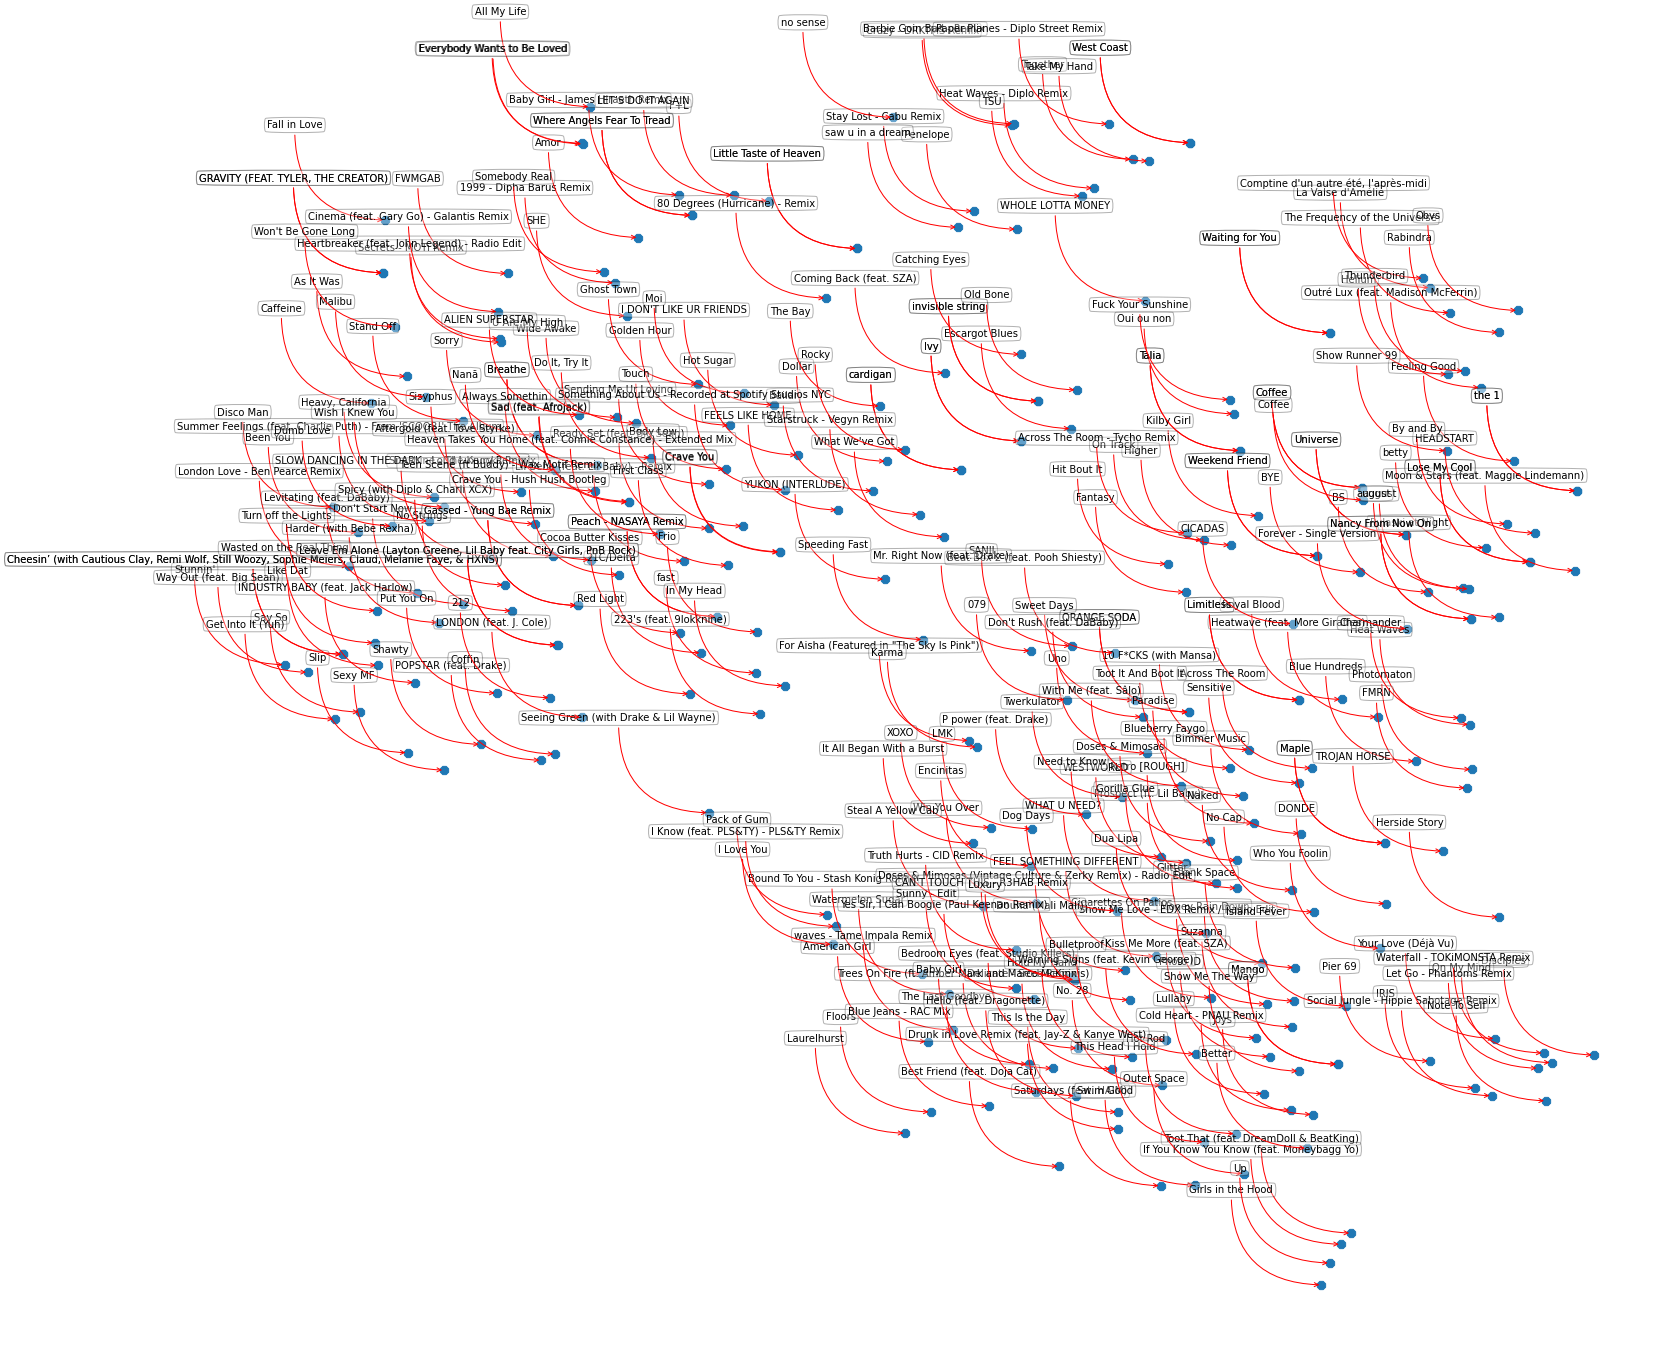

In [8]:
# Plot tracks

fig = figure(figsize=(20, 20))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=80,   marker="8")

for row_id in range(0, len(songs_k_loves)):
    #if (df.ARTIST[row_id] in ['The National']):
        target_word = songs_k_loves.name[row_id]
        xx = X_scaled[row_id, 0]
        yy = X_scaled[row_id, 1]
        plt.annotate(target_word, (xx,yy), size=10, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))

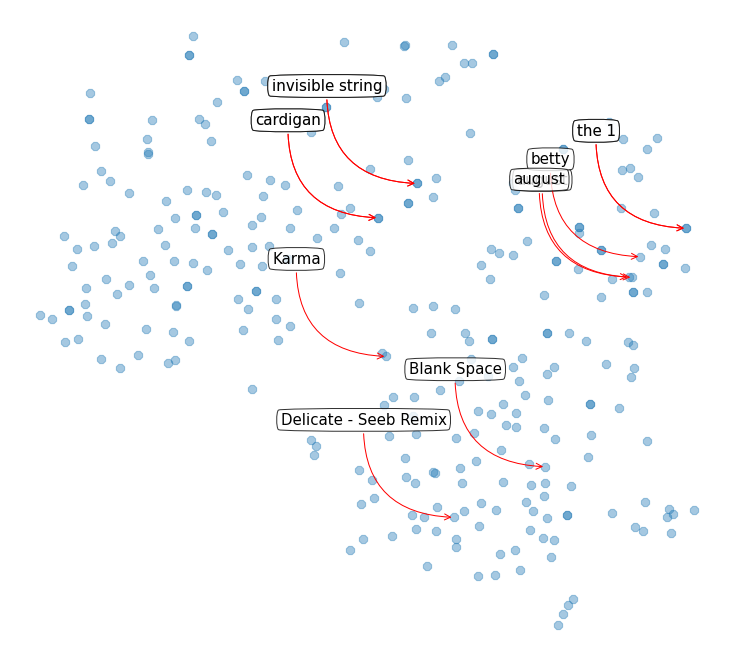

In [9]:
# Plot specific tracks

fig = figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=80,   marker="8", alpha = 0.4)

for row_id in range(0, len(songs_k_loves)):
    if (songs_k_loves.artist[row_id] in ['Taylor Swift']):
        target_word = songs_k_loves.name[row_id]
        xx = X_scaled[row_id, 0]
        yy = X_scaled[row_id, 1]
        plt.annotate(target_word, (xx,yy), size=15, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))

In [10]:
# Instantiate PCA to project features onto 2-D space

pca_scaled = PCA(n_components=2)
pca_scaled.fit(scaled_df)

# Determine transformed features
x_pca_scaled = pca_scaled.fit_transform(scaled_df)

In [11]:
print(pca_scaled.explained_variance_ratio_) 

[0.27435035 0.12819028]


[0.27435035 0.12819028]


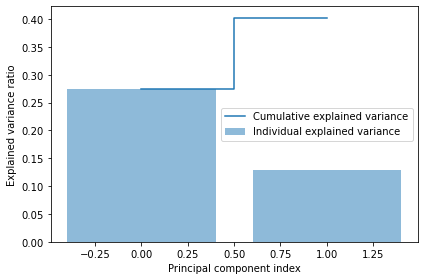

In [12]:
# Determine explained variance using explained_variance_ration_ attribute
print(pca_scaled.explained_variance_ratio_) 
exp_var_pca_scaled = pca_scaled.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca_scaled)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca_scaled)), exp_var_pca_scaled, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [13]:
clf_scaled = svm.OneClassSVM(kernel="rbf", gamma=0.02, nu=0.1)
clf_scaled.fit(x_pca_scaled)

OneClassSVM(gamma=0.02, nu=0.1)

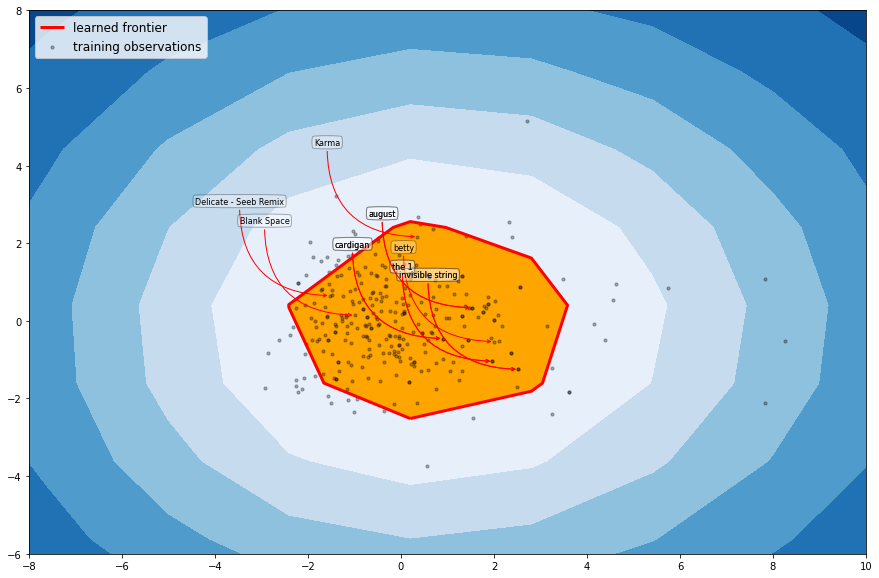

In [26]:
xx, yy = np.meshgrid(np.linspace(-500, 800, 500), np.linspace(-200,800, 500))

Z = clf_scaled.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15, 10),)
#plt.name("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

#visualize song titles

for row_id in range(0, len(songs_k_loves)):
    if (songs_k_loves.artist[row_id] in ['Taylor Swift']):
        target_word = songs_k_loves.name[row_id]
        xxx = x_pca_scaled[row_id, 0]
        yyy = x_pca_scaled[row_id, 1]
        plt.annotate(target_word, (xxx,yyy), size=8, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))


b1 = plt.scatter(x_pca_scaled[:, 0], x_pca_scaled[:, 1], c='black', s=10, alpha= 0.3)
plt.axis('tight')
plt.xlim((-8, 10))
plt.ylim((-6, 8))

leg = plt.legend([a.collections[0], b1, ],
           ["learned frontier", "training observations"],
           loc="upper left",prop={'size':12}, frameon=True)
plt.savefig("./ml_music_profile_b", dpi = 200)
plt.show()

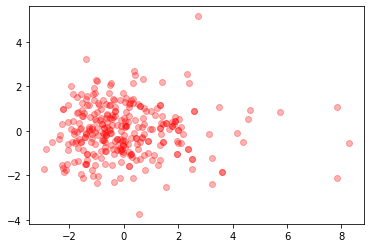

In [15]:
plt.scatter(x_pca_scaled[:, 0], x_pca_scaled[:, 1], c='red', alpha= 0.3)

In [16]:
scaled_df.shape

(300, 10)

In [17]:
### Retry - this time setting PCA n_components to be the same as number of features
# Instantiate PCA

pca_scaled_10 = PCA(n_components=10)
pca_scaled_10.fit(scaled_df)

# Determine transformed features
x_pca_scaled10 = pca_scaled_10.fit_transform(scaled_df)

In [18]:
np.cumsum(pca_scaled_10.explained_variance_ratio_ *100)

array([ 27.43503507,  40.25406328,  51.9835672 ,  62.94653169,
        73.1546023 ,  81.37094313,  88.10641506,  93.55354546,
        97.60258922, 100.        ])

Variance explained by the First principal component =  27.43503506990608
Variance explained by the First 2 principal component =  40.254063275862066
Variance explained by the First 3 principal component =  51.98356719990612
Variance explained by the First 10 principal component =  100.0


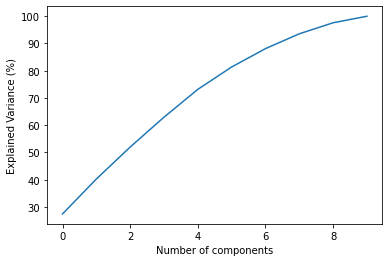

In [19]:
plt.plot(np.cumsum(pca_scaled_10.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance (%)')

print('Variance explained by the First principal component = ',
     np.cumsum(pca_scaled_10.explained_variance_ratio_*100)[0])

print('Variance explained by the First 2 principal component = ',
     np.cumsum(pca_scaled_10.explained_variance_ratio_*100)[1])

print('Variance explained by the First 3 principal component = ',
     np.cumsum(pca_scaled_10.explained_variance_ratio_*100)[2])

print('Variance explained by the First 10 principal component = ',
     np.cumsum(pca_scaled_10.explained_variance_ratio_*100)[9])



In [20]:
pca10_components = abs(pca_scaled_10.components_)
print(pca10_components)

[[0.34032875 0.46811171 0.51383289 0.06192071 0.03057186 0.44915016
  0.27765897 0.03270295 0.33686553 0.05363276]
 [0.47876273 0.33537864 0.22528601 0.21418696 0.29600009 0.18073437
  0.19846048 0.48190421 0.34909548 0.21888518]
 [0.09498355 0.11384292 0.0952356  0.23296752 0.71395785 0.09823829
  0.0136274  0.60681558 0.07830785 0.14403016]
 [0.22167909 0.01756833 0.00389589 0.63195545 0.32131705 0.01197566
  0.17142603 0.05238394 0.01564019 0.64451782]
 [0.09881331 0.1854185  0.08292677 0.44472422 0.0297424  0.12465555
  0.62368069 0.04861332 0.14223936 0.56850939]
 [0.23777762 0.02348043 0.11090562 0.4301043  0.11461635 0.18814455
  0.39511711 0.31107975 0.63135823 0.21350425]
 [0.24768045 0.02964736 0.05452199 0.32600293 0.28695943 0.45361695
  0.47984252 0.40857139 0.3093038  0.21808841]
 [0.54375082 0.35708214 0.07172194 0.0742303  0.42787977 0.23353266
  0.05523812 0.35754671 0.33026211 0.29764183]
 [0.37774359 0.30724655 0.36865962 0.03580738 0.12527053 0.66644938
  0.18024482

In [21]:
print('Top 3 most important features in each component')
print('===============================================')
for row in range(pca10_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca10_components[row]), 3)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca10_components[row])[temp])][:3]
    
    # print the top 4 feature names
    print(f'Component {row}: {scaled_df.columns[indices].to_list()}')

Top 3 most important features in each component
Component 0: ['loudness', 'energy', 'acousticness']
Component 1: ['liveness', 'danceability', 'valence']
Component 2: ['speechiness', 'liveness', 'mode']
Component 3: ['tempo', 'mode', 'speechiness']
Component 4: ['instrumentalness', 'tempo', 'mode']
Component 5: ['valence', 'mode', 'instrumentalness']
Component 6: ['instrumentalness', 'acousticness', 'liveness']
Component 7: ['danceability', 'speechiness', 'liveness']
Component 8: ['acousticness', 'danceability', 'loudness']
Component 9: ['loudness', 'energy', 'instrumentalness']
